In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.metrics import log_loss

# Load the datasets
df_train = pd.read_csv("X_Train_Data_Input.csv")
df_train_target = pd.read_csv("Y_Train_Data_Target.csv")
df_test = pd.read_csv("X_Test_Data_Input.csv")
df_test_target = pd.read_csv("Y_Test_Data_Target.csv")

# Display the shape of datasets
print(f'Training Data Shape: {df_train.shape}, Test Data Shape: {df_test.shape}')


Training Data Shape: (785133, 23), Test Data Shape: (261712, 23)


In [62]:
df_train.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0


In [63]:
df_train_target.head()

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0
2,22ba388e7dd14c13342c49e75fc29dda,0
3,59f9b981472d97342587fb3e6392aeb1,1
4,f6317cf7ecf126859804eddff279aead,0


In [64]:
# Checking for missing values
print(df_train.isnull().sum())

# Basic Statistical Summary
print(df_train.describe())

ID               0
Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64
             Column0        Column1        Column2        Column3  \
count  785124.000000  785133.000000  785133.000000  658830.000000   
mean        0.440757    1321.788614    2951.279411      -0.000210   
std         1.163275     907.267965    2143.140140       0.999935   
min         0.000000   -1080.000000     -47.000000      -2.028572   
25%         0.000000     515.000000    1129.000000      -0.675216   
50%         0.000000    1173.000000    2709.000000       0.678139   
75%         0.000000    2435.000000    4472.000000       0.678139  

In [65]:
## higly null value column droped

df_train.drop(["Column3","Column5","Column9","Column14"], axis =1, inplace=True)
df_test.drop(["Column3","Column5","Column9","Column14"], axis = 1, inplace=True)

In [66]:
## ID column drop 
df_train.drop("ID", axis =1, inplace=True)
df_train_target.drop("ID", axis =1, inplace= True)
df_test.drop("ID", axis =1 , inplace=True)
df_test_target.drop("ID", axis =1 , inplace=True)

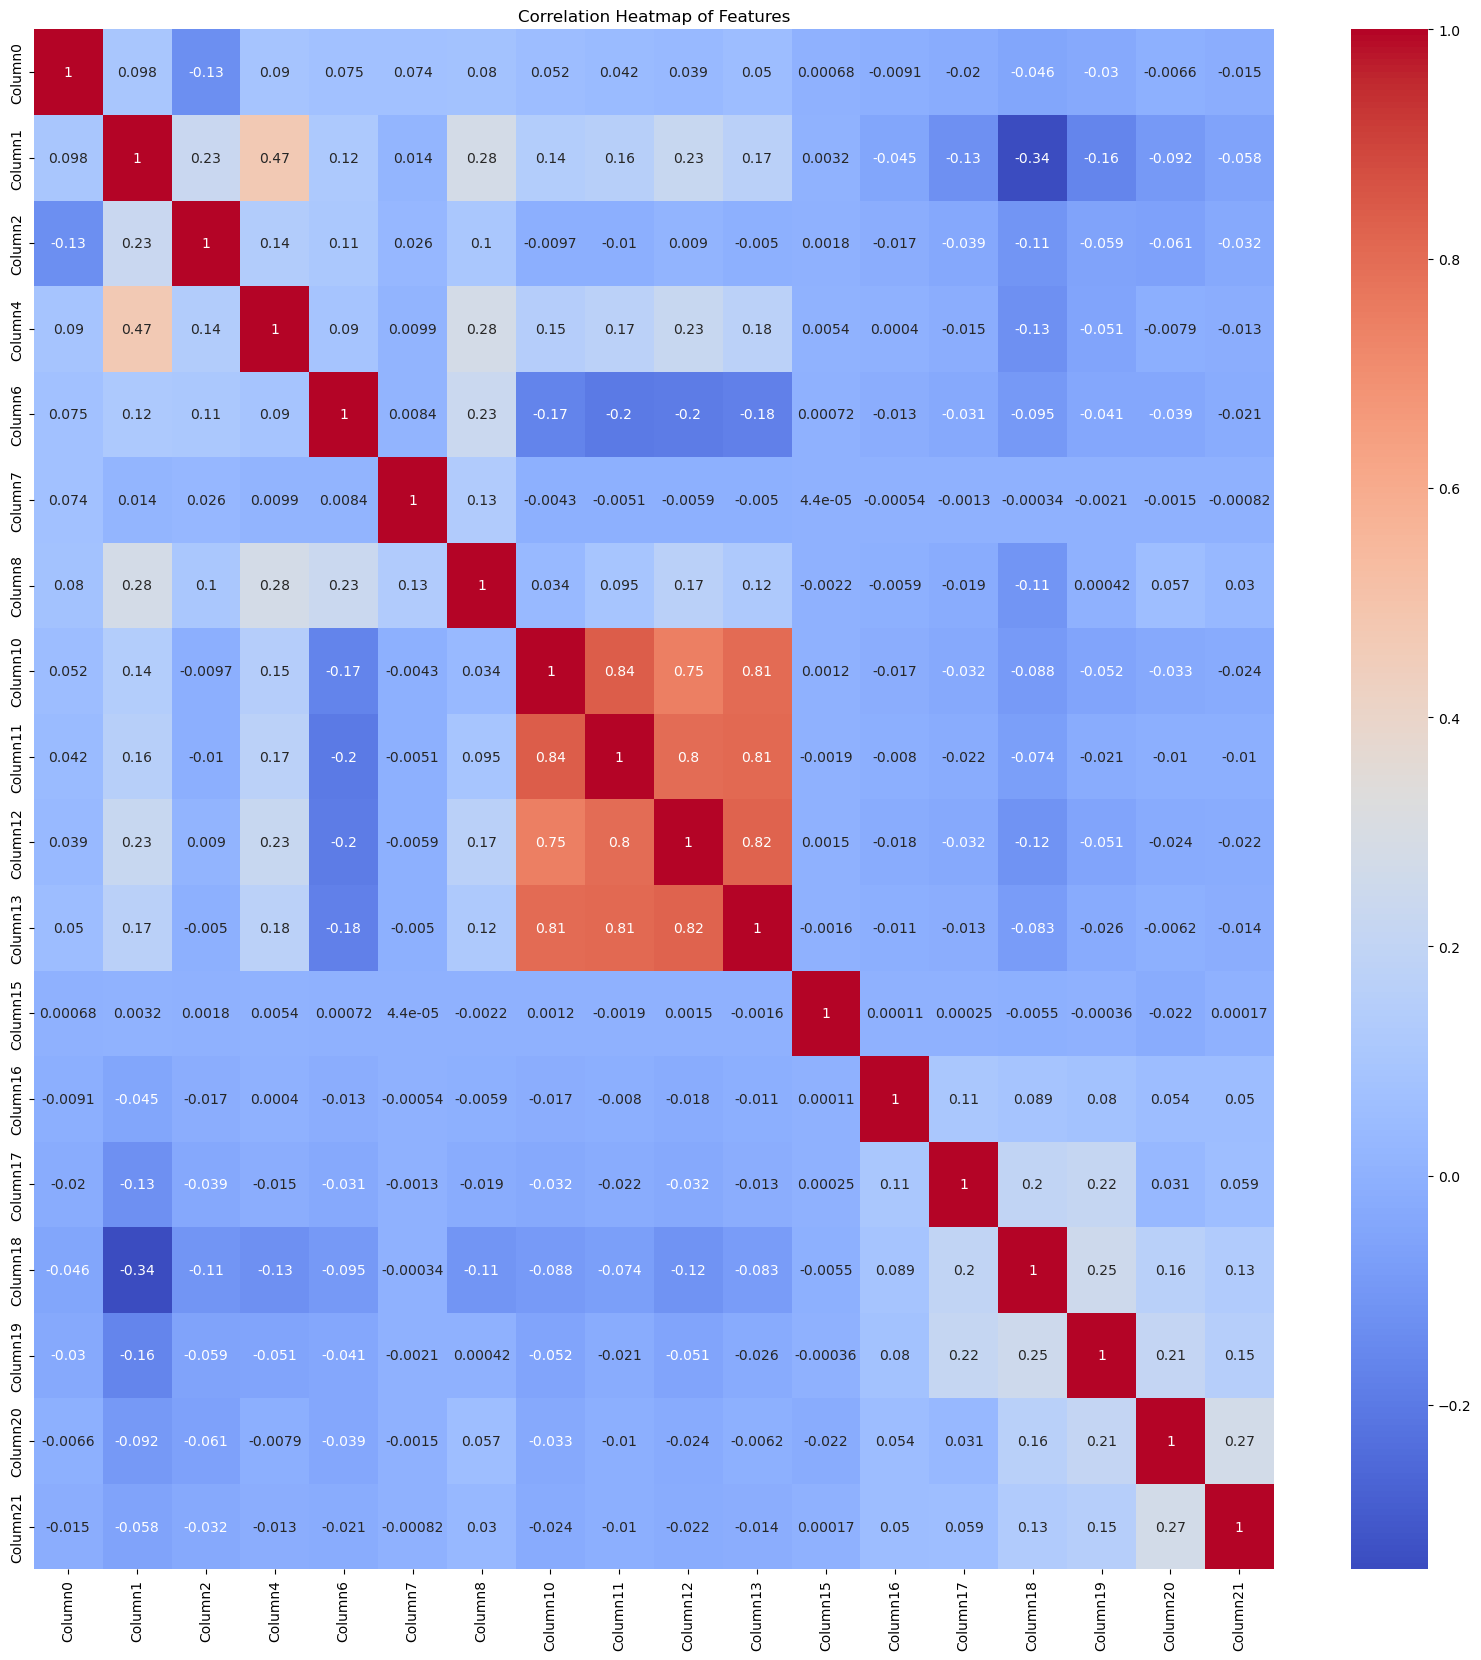

In [67]:
# Correlation heatmap for feature analysis
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [21]:
# Step 1: Calculate the correlation matrix
corr_matrix = df_train.corr().abs()  # Use absolute value to ignore negative correlations

# Step 2: Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Identify columns to drop (threshold > 0.9)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Step 4: Drop the columns
df_train = df_train.drop(columns=to_drop)
df_test = df_test.drop(columns=to_drop)

# Print the reduced dataframe
print(df_train)

        Column0  Column1  Column2   Column4   Column6   Column7   Column8  \
0           2.0     2495   3726.0  0.701403  0.434190 -0.015603  0.606265   
1           0.0     2495   3454.0  0.701403  1.554998 -0.015574  0.329946   
2           2.0     2495   4543.0 -1.429540 -0.407939 -0.015607 -0.774979   
3           0.0      211     59.0       NaN -0.407939 -0.015607 -0.774979   
4           0.0      718    950.0 -1.855728 -0.407939 -0.015607 -0.774979   
...         ...      ...      ...       ...       ...       ...       ...   
785128      0.0      304   1126.0  0.701403 -0.407939 -0.015607 -0.774979   
785129      0.0     2495   2265.0  0.701403 -0.407939 -0.015607  0.509591   
785130      0.0     2495   3760.0  0.701403 -0.407939 -0.015607  0.218972   
785131      0.0     2480   4493.0  0.062121 -0.407939 -0.015607  0.400071   
785132      0.0     2495   4202.0  0.701403  3.440511 -0.015603  0.471097   

        Column10  Column12  Column15  Column16  Column17  Column18  Column1

In [22]:
df_train.columns

Index(['Column0', 'Column1', 'Column2', 'Column4', 'Column6', 'Column7',
       'Column8', 'Column10', 'Column12', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21'],
      dtype='object')

In [24]:

# 1. Handling Missing Values
# Use mean, median, or mode for imputation
imputer = SimpleImputer(strategy='mean')  # Change strategy as needed
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_test_imputed = pd.DataFrame(imputer.transform(df_test), columns=df_train.columns)

# 2. Scaling
# Standardization
standard_scaler = StandardScaler()
df_train_standardized = pd.DataFrame(standard_scaler.fit_transform(df_train_imputed), columns=df_train_imputed.columns)
df_test_standardized = pd.DataFrame(standard_scaler.transform(df_test_imputed), columns=df_test_imputed.columns)

# Normalization
minmax_scaler = MinMaxScaler()
df_train_normalized = pd.DataFrame(minmax_scaler.fit_transform(df_train_imputed), columns=df_train_imputed.columns)
df_test_normalized = pd.DataFrame(minmax_scaler.transform(df_test_imputed), columns=df_test_imputed.columns)

# Robust Scaling
robust_scaler = RobustScaler()
df_train_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df_train_imputed), columns=df_train_imputed.columns)
df_test_robust_scaled = pd.DataFrame(robust_scaler.transform(df_test_imputed), columns=df_test_imputed.columns)


# Outputting the processed data
print("Imputed Data:\n", df_train_imputed)
print("\nStandardized Data:\n", df_train_standardized)
print("\nNormalized Data:\n", df_train_normalized)
print("\nRobust Scaled Data:\n", df_train_robust_scaled)


Imputed Data:
         Column0  Column1  Column2   Column4   Column6   Column7   Column8  \
0           2.0   2495.0   3726.0  0.701403  0.434190 -0.015603  0.606265   
1           0.0   2495.0   3454.0  0.701403  1.554998 -0.015574  0.329946   
2           2.0   2495.0   4543.0 -1.429540 -0.407939 -0.015607 -0.774979   
3           0.0    211.0     59.0 -0.000855 -0.407939 -0.015607 -0.774979   
4           0.0    718.0    950.0 -1.855728 -0.407939 -0.015607 -0.774979   
...         ...      ...      ...       ...       ...       ...       ...   
785128      0.0    304.0   1126.0  0.701403 -0.407939 -0.015607 -0.774979   
785129      0.0   2495.0   2265.0  0.701403 -0.407939 -0.015607  0.509591   
785130      0.0   2495.0   3760.0  0.701403 -0.407939 -0.015607  0.218972   
785131      0.0   2480.0   4493.0  0.062121 -0.407939 -0.015607  0.400071   
785132      0.0   2495.0   4202.0  0.701403  3.440511 -0.015603  0.471097   

        Column10  Column12  Column15  Column16  Column17  Co

In [25]:
df_train_standardized.shape

(785133, 16)

In [26]:
df_train_target.value_counts()

target
0         711100
1          74033
Name: count, dtype: int64

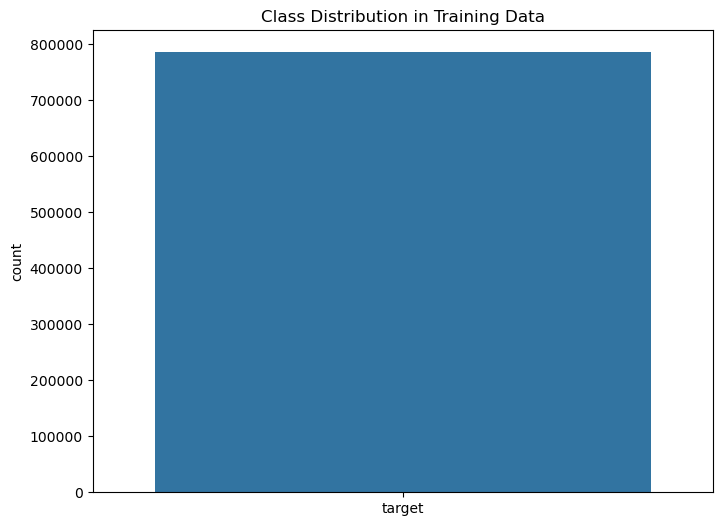

target
0         711100
1          74033
Name: count, dtype: int64


In [28]:
# Visualize class distribution
plt.figure(figsize=(8,6))
sns.countplot(df_train_target)
plt.title('Class Distribution in Training Data')
plt.show()

# Print class distribution in numbers
class_distribution = df_train_target.value_counts()
print(class_distribution)


## Highly imbalance dataset

## target column having:

## class 0 having 711100
## class 1 having 740333

In [29]:
## handling the imbalance datset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(df_train_standardized, df_train_target)

C:\Users\atiku\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\atiku\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\atiku\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\atiku\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\atiku\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [50]:
def evaluate_clf(true, predicted, prob):
    """
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    """
    acc = accuracy_score(true, predicted)  # Calculate Accuracy
    f1 = f1_score(true, predicted)  # Calculate F1-score
    precision = precision_score(true, predicted)  # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted)  # Calculate Roc
    y_test_prob = log_loss(true, prob) # log loss
    return acc, f1, precision, recall, roc_auc, y_test_prob

In [51]:
def evaluate_models(X, y, models):
    """
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    """
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    f1_score_list = []
    models_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)  # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Training set performance
        (
            model_train_accuracy,
            model_train_f1,
            model_train_precision,
            model_train_recall,
            model_train_rocauc_score,
            y_train_prob
        ) = evaluate_clf(y_train, y_train_pred, y_train_prob)

        # Test set performance
        (
            model_test_accuracy,
            model_test_f1,
            model_test_precision,
            model_test_recall,
            model_test_rocauc_score,
            y_test_prob
        ) = evaluate_clf(y_test, y_test_pred,y_test_prob)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print("Model performance for Training set")
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- F1 score: {:.4f}".format(model_train_f1))
        print("- Precision: {:.4f}".format(model_train_precision))
        print("- Recall: {:.4f}".format(model_train_recall))
        print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))
        print("- Log Loss Score{}".format(y_train_prob))

        print("----------------------------------")

        print("Model performance for Test set")
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        print("- F1 score: {:.4f}".format(model_test_f1))
        print("- Precision: {:.4f}".format(model_test_precision))
        print("- Recall: {:.4f}".format(model_test_recall))
        print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
        print("- Logg Loss: {}".format(y_test_prob))
        f1_score_list.append(model_test_f1)
        print("=" * 35)
        print("\n")

    report = pd.DataFrame(
        list(zip(models_list, f1_score_list)), columns=["Model Name", "f1_score"]
    ).sort_values(by=["f1_score"], ascending=False)

    return report

In [52]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
}

In [54]:
import warnings
warnings.filterwarnings("ignore")
print(evaluate_models(X_resample, y_resample, models))

Random Forest
Model performance for Training set
- Accuracy: 0.9945
- F1 score: 0.9945
- Precision: 0.9892
- Recall: 1.0000
- Roc Auc Score: 0.9945
- Log Loss Score0.017734301638717413
----------------------------------
Model performance for Test set
- Accuracy: 0.9858
- F1 score: 0.9860
- Precision: 0.9733
- Recall: 0.9989
- Roc Auc Score: 0.9857
- Logg Loss: 0.048060573111745046


Decision Tree
Model performance for Training set
- Accuracy: 0.9997
- F1 score: 0.9997
- Precision: 0.9997
- Recall: 0.9996
- Roc Auc Score: 0.9997
- Log Loss Score0.0007500408477461758
----------------------------------
Model performance for Test set
- Accuracy: 0.9790
- F1 score: 0.9791
- Precision: 0.9774
- Recall: 0.9807
- Roc Auc Score: 0.9790
- Logg Loss: 0.7501836573360774


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9829
- F1 score: 0.9832
- Precision: 0.9679
- Recall: 0.9989
- Roc Auc Score: 0.9829
- Log Loss Score0.06189489197258645
----------------------------------
Model 

## Among the above model , I have choosen RandomForestClassifier because of the high f1_score, accuracy 

In [117]:
 random_forest = RandomForestClassifier()

In [118]:
random_forest.fit(X_resample, y_resample)

RandomForestClassifier()

Accuracy: 0.9735663630250045
Precision: 0.7897037713689156
Recall: 0.9808736526460815
F1 Score: 0.8749683715886499
AUC-ROC Score: 0.9768396208588458


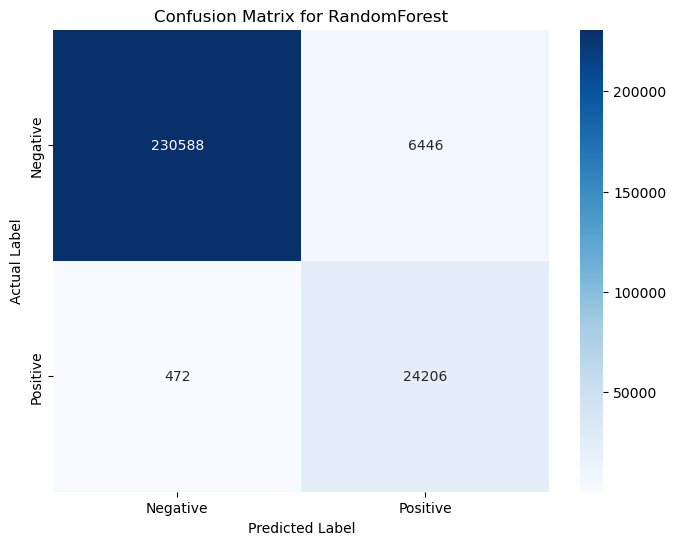

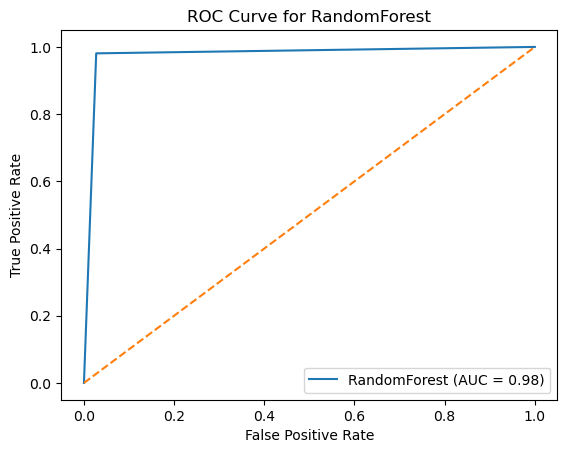

In [69]:
# Predictions using the  RandomForest model
y_pred_rf = random_forest.predict(df_test_standardized)

# Accuracy
accuracy_rf = accuracy_score(df_test_target, y_pred_rf)
precision_rf = precision_score(df_test_target, y_pred_rf)
recall_rf = recall_score(df_test_target, y_pred_rf)
f1_rf = f1_score(df_test_target, y_pred_rf)
roc_auc_rf = roc_auc_score(df_test_target, y_pred_rf)

# Display the metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"AUC-ROC Score: {roc_auc_rf}")

# Confusion Matrix
cm = confusion_matrix(df_test_target, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for RandomForest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(df_test_target, y_pred_rf)
plt.plot(fpr, tpr, label='RandomForest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest')
plt.legend(loc="lower right")
plt.show()


In [113]:
rf_model = RandomForestClassifier(random_state=42,class_weight="balanced" )
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(random_forest, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', verbose=2)
grid_search_rf.fit(df_train_standardized, df_train_target)
# Best parameters from Grid Search
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  24.3s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  24.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  22.7s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  22.7s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  23.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  44.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  44.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  49.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  49.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  49.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=  22.0s
[CV] END .max_depth=10, min_samples_split=5, n_e

In [114]:
random_forest = RandomForestClassifier(max_depth=20, min_samples_split= 10, n_estimators= 100, random_state=42)

In [115]:
random_forest.fit(X_resample, y_resample)

RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=42)

Accuracy: 0.9719997554563795
Precision: 0.7735040040355634
Recall: 0.9941648431801605
F1 Score: 0.8700617065040074
AUC-ROC Score: 0.9819284774301706


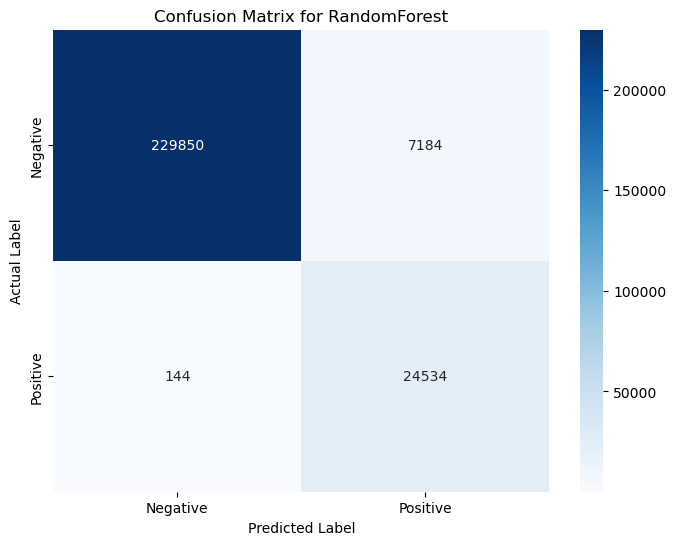

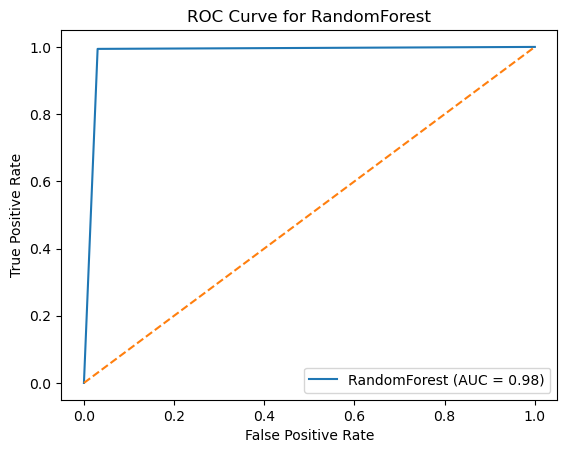

In [116]:
# Predictions using the best RandomForest model
y_pred_rf = random_forest.predict(df_test_standardized)

# Accuracy
accuracy_rf = accuracy_score(df_test_target, y_pred_rf)
precision_rf = precision_score(df_test_target, y_pred_rf)
recall_rf = recall_score(df_test_target, y_pred_rf)
f1_rf = f1_score(df_test_target, y_pred_rf)
roc_auc_rf = roc_auc_score(df_test_target, y_pred_rf)

# Display the metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"AUC-ROC Score: {roc_auc_rf}")

# Confusion Matrix
cm = confusion_matrix(df_test_target, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for RandomForest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(df_test_target, y_pred_rf)
plt.plot(fpr, tpr, label='RandomForest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest')
plt.legend(loc="lower right")
plt.show()
